In [18]:
import numpy as np
from ncepsigma import Spharmt
class ncepsfc(object):
    # read ncep 'sfc' file (fortran gridded binary data)
    def __init__(self,filename):
        from _read_sfc import read_griddata, read_header
        from _write_sfc import write_griddata
        nlons,nlats,lsoil,idate,fhour = read_header(filename)
        self._read_griddata = read_griddata
        self._write_griddata = write_griddata
        self.nlons = nlons; self.nlats = nlats
        self.lsoil = lsoil
        #self.idate = '%04i%02i%02i%02i' % (idate[3],idate[1],idate[2],idate[0])
        self.idate = idate
        self.fhour = fhour
        self.filename = filename
        sp = Spharmt(nlons,nlats,nlats/2,6.3712e6,gridtype='gaussian')
        self.lats = (180./np.pi)*sp.lats
        self.lons = (360./nlons)*np.arange(nlons)
    def griddata(self):
        grids2d,grids2d_desc,grids2d_name,grids3d,grids3d_desc,grids3d_name = self._read_griddata(self.filename,self.nlons,self.nlats,self.lsoil)
        grds2d_desc = []
        for n in range(grids2d_desc.shape[0]):
            s = grids2d_desc[n].tostring()
            s = s.encode('ascii').replace('\x00','').strip()
            grds2d_desc.append(s)
        grds2d_name = []
        for n in range(grids2d_name.shape[0]):
            s = grids2d_name[n].tostring()
            s = s.encode('ascii').replace('\x00','').strip()
            grds2d_name.append(s)
        grds3d_desc = []
        for n in range(grids3d_desc.shape[0]):
            s = grids3d_desc[n].tostring()
            s = s.encode('ascii').replace('\x00','').strip()
            grds3d_desc.append(s)
        grds3d_name = []
        for n in range(grids3d_name.shape[0]):
            s = grids3d_name[n].tostring()
            s = s.encode('ascii').replace('\x00','').strip()
            grds3d_name.append(s)
        return grids2d.T,grds2d_desc,grds2d_name,grids3d.T,grds3d_desc,grds3d_name

In [19]:
sfc_gdas = ncepsfc('sfcf00.gdas2.1979010100')
grids2d,grds2d_desc,grds2d_name,grids3d,grds3d_desc,grds3d_name = sfc_gdas.griddata()

In [20]:
import xarray as xr
data_dir = 'sfcf00.gdas2.1979010100_o.nc' 
ds_sfc_gdas = xr.open_dataset(data_dir)

In [21]:
#sfc._write_griddata('test_ini', idate, fhour, grids2d.T, grids3d.T)

In [22]:
print(grids2d.shape, grds2d_name, grids3d.shape)

((32, 190, 384), ['slmsk', 'orog', 'tsea', 'sheleg', 'tg3', 'zorl', 'alvsf', 'alvwf', 'alnsf', 'alnwf', 'vfrac', 'canopy', 'f10m', 't2m', 'q2m', 'vtype', 'stype', 'facsf', 'facwf', 'uustar', 'ffmm', 'ffhh', 'hice', 'fice', 'tisfc', 'tprcp', 'srflag', 'snwdph', 'shdmin', 'shdmax', 'slope', 'snoalb'], (3, 4, 190, 384))


In [23]:
ds_sfc_gdas

<xarray.Dataset>
Dimensions:  (lat: 94, layer: 4, lon: 192)
Coordinates:
  * layer    (layer) int32 1 2 3 4
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * lat      (lat) float32 88.54195 86.65317 84.75323 ... -86.65317 -88.54195
Data variables:
    slmsk    (lat, lon) float64 ...
    orog     (lat, lon) float64 ...
    tsea     (lat, lon) float64 ...
    sheleg   (lat, lon) float64 ...
    tg3      (lat, lon) float64 ...
    zorl     (lat, lon) float64 ...
    alvsf    (lat, lon) float64 ...
    alvwf    (lat, lon) float64 ...
    alnsf    (lat, lon) float64 ...
    alnwf    (lat, lon) float64 ...
    vfrac    (lat, lon) float64 ...
    canopy   (lat, lon) float64 ...
    f10m     (lat, lon) float64 ...
    t2m      (lat, lon) float64 ...
    q2m      (lat, lon) float64 ...
    vtype    (lat, lon) float64 ...
    stype    (lat, lon) float64 ...
    facsf    (lat, lon) float64 ...
    facwf    (lat, lon) float64 ...
    uustar   (lat, lon) float64 .

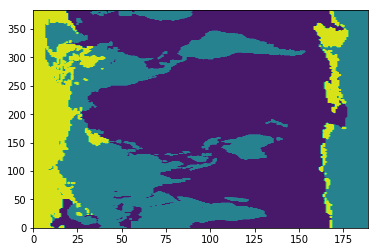

In [24]:
import matplotlib.pyplot as plt
plt.contourf(grids2d[0].T)

In [25]:
grids2d[0].T.shape

(384, 190)

In [26]:
ds_sfc_gdas.slmsk.values.T.shape

(192, 94)

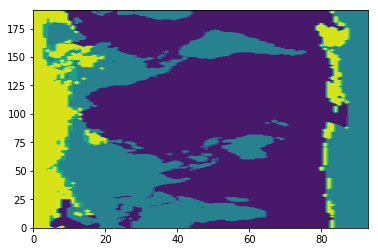

In [27]:
plt.contourf(ds_sfc_gdas.slmsk.values.T)

In [28]:
grids2d = np.zeros((32,ds_sfc_gdas.slmsk.values.T.shape[1],ds_sfc_gdas.slmsk.values.T.shape[0]))
grids3d = np.zeros((3,4,ds_sfc_gdas.slmsk.values.T.shape[1],ds_sfc_gdas.slmsk.values.T.shape[0]))
grids2d[0,:,:]   = ds_sfc_gdas.slmsk.values
grids2d[1,:,:]   = ds_sfc_gdas.orog.values
grids2d[2,:,:]   = ds_sfc_gdas.tsea.values
grids2d[3,:,:]   = ds_sfc_gdas.sheleg.values
grids2d[4,:,:]   = ds_sfc_gdas.tg3.values
grids2d[5,:,:]   = ds_sfc_gdas.zorl.values
grids2d[6,:,:]   = ds_sfc_gdas.alvsf.values
grids2d[7,:,:]   = ds_sfc_gdas.alvwf.values
grids2d[8,:,:]   = ds_sfc_gdas.alnsf.values
grids2d[9,:,:]   = ds_sfc_gdas.alnwf.values
grids2d[10,:,:]   = ds_sfc_gdas.vfrac.values
grids2d[11,:,:]   = ds_sfc_gdas.canopy.values
grids2d[12,:,:]  = ds_sfc_gdas.f10m.values
grids2d[13,:,:]  = ds_sfc_gdas.t2m.values
grids2d[14,:,:]  = ds_sfc_gdas.q2m.values
grids2d[15,:,:]  = ds_sfc_gdas.vtype.values
grids2d[16,:,:]  = ds_sfc_gdas.stype.values
grids2d[17,:,:]  = ds_sfc_gdas.facsf.values
grids2d[18,:,:]  = ds_sfc_gdas.facwf.values
grids2d[19,:,:]  = ds_sfc_gdas.uustar.values
grids2d[20,:,:]  = ds_sfc_gdas.ffmm.values
grids2d[21,:,:]  = ds_sfc_gdas.ffhh.values
grids2d[22,:,:]  = ds_sfc_gdas.hice.values
grids2d[23,:,:]  = ds_sfc_gdas.fice.values
grids2d[24,:,:]  = ds_sfc_gdas.tisfc.values
grids2d[25,:,:]  = ds_sfc_gdas.tprcp.values
grids2d[26,:,:]  = ds_sfc_gdas.srflag.values
grids2d[27,:,:]  = ds_sfc_gdas.snwdph.values
grids2d[28,:,:]  = ds_sfc_gdas.shdmin.values
grids2d[29,:,:]  = ds_sfc_gdas.shdmax.values
grids2d[30,:,:]  = ds_sfc_gdas.slope.values
grids2d[31,:,:]  = ds_sfc_gdas.snoalb.values

for lay_i in range(4):
    grids3d[0,lay_i,:,:] = ds_sfc_gdas.stc.values[lay_i,:,:]
    grids3d[1,lay_i,:,:] = ds_sfc_gdas.smc.values[lay_i,:,:]
    grids3d[2,lay_i,:,:] = ds_sfc_gdas.slc.values[lay_i,:,:]

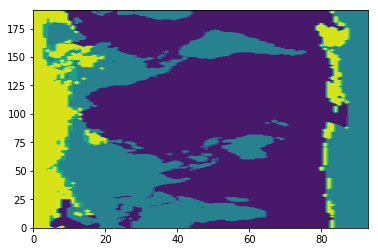

In [29]:
plt.contourf(grids2d[0].T)

In [30]:
# comparing this with sig_ini

In [35]:
sfc_ini = ncepsfc('sfc_ini')
grids2d_,grds2d_desc_,grds2d_name_,grids3d_,grds3d_desc_,grds3d_name_ = sfc_ini.griddata()

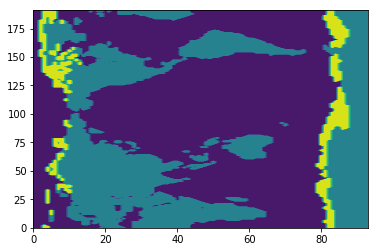

In [36]:
plt.contourf(grids2d_[0].T)

In [37]:
print(grids2d.shape, grids2d_.shape)

((32, 94, 192), (32, 94, 192))


In [38]:
sfc_ini._write_griddata('test_ini_', sfc_gdas.idate, sfc_gdas.fhour, grids2d.T, grids3d.T)

In [39]:
sfc_ini = ncepsfc('test_ini_')
grids2d_,grds2d_desc_,grds2d_name_,grids3d_,grds3d_desc_,grds3d_name_ = sfc_ini.griddata()

In [40]:
sfc_ini.nlons

192

In [41]:
sfc_ini.nlats

94

In [42]:
sfc_ini.lsoil

4

In [43]:
grds2d_name_

['slmsk',
 'orog',
 'tsea',
 'sheleg',
 'tg3',
 'zorl',
 'alvsf',
 'alvwf',
 'alnsf',
 'alnwf',
 'vfrac',
 'canopy',
 'f10m',
 't2m',
 'q2m',
 'vtype',
 'stype',
 'facsf',
 'facwf',
 'uustar',
 'ffmm',
 'ffhh',
 'hice',
 'fice',
 'tisfc',
 'tprcp',
 'srflag',
 'snwdph',
 'shdmin',
 'shdmax',
 'slope',
 'snoalb']